# United Kingdom 

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
np.bool = np.bool_

# Load the data from the CSV file
df = pd.read_csv('Large_GB_corr.csv')

In [2]:
df.head()

,Unnamed: 0,essround,edition,idno,dweight,pspwght,pweight,anweight,prob,stratum,...,wkhtotp,wrkac6m,wrkctr,wrkctra,wrkctrhu,wkdcorg,wkdcorga,nacer1,nacer11,nacer2
0,essround,1.000000,-0.710918,0.402380,-0.000007,-0.097910,5.110687e-01,0.116438,0.064932,-0.540327,...,0.007988,-0.014850,NaN,-0.009316,NaN,NaN,-0.017270,NaN,-0.069630,0.099763
1,edition,-0.710918,1.000000,-0.531854,0.000008,0.101647,-1.709862e-01,0.031239,NaN,NaN,...,-0.018515,-0.015601,NaN,-0.012982,NaN,NaN,-0.014976,NaN,-0.048143,-0.019407
2,idno,0.402380,-0.531854,1.000000,-0.000118,-0.047414,2.167149e-02,-0.035131,0.024561,-0.371079,...,0.004515,0.009987,0.001630,0.001291,NaN,-0.026588,-0.001204,-0.011522,-0.026411,0.015850
3,dweight,-0.000007,0.000008,-0.000118,1.000000,0.818198,-5.950000e-07,0.722387,-0.821312,-0.021694,...,-0.253776,0.085320,0.017169,0.042045,NaN,-0.135216,0.078927,0.014826,0.046144,0.069220
4,pspwght,-0.097910,0.101647,-0.047414,0.818198,1.000000,-3.646778e-02,0.898274,-0.698242,-0.058207,...,-0.192919,0.117181,0.022559,0.063565,NaN,-0.136201,0.111211,0.034728,0.057030,0.112226


In [3]:
# Drop 'name' column
df_dropped = df.drop(['Unnamed: 0', 'essround', 'edition', 'idno', "wrkctrhu"], axis=1)

df_dropped


non_null_counts = df_dropped.count()
columns_to_keep = non_null_counts >= 130
filtered_df = df_dropped.loc[:, columns_to_keep]
filtered_df

,dweight,pspwght,pweight,anweight,stfgov,trstlgl,trstplt,trstprt,hhmmb,gndr,...,uempla,uemplap,uempli,uemplip,wkhct,wkhtot,wkhtotp,wrkac6m,wrkctra,wkdcorga
0,-0.000007,-0.097910,5.110687e-01,0.116438,-0.008729,0.012450,-0.018909,-0.022746,-0.032028,0.004498,...,-0.004880,-0.020635,-0.010372,-0.009900,-0.003825,-0.005998,0.007988,-0.014850,-0.009316,-0.017270
1,0.000008,0.101647,-1.709862e-01,0.031239,-0.025656,-0.035307,-0.007624,-0.002961,0.014608,-0.008113,...,-0.011186,0.003737,0.002806,-0.004575,-0.022274,-0.031544,-0.018515,-0.015601,-0.012982,-0.014976
2,-0.000118,-0.047414,2.167149e-02,-0.035131,0.016663,0.002065,-0.010770,-0.010277,-0.022154,-0.003372,...,0.003196,-0.006216,-0.009735,-0.000537,-0.003780,0.003896,0.004515,0.009987,0.001291,-0.001204
3,1.000000,0.818198,-5.950000e-07,0.722387,0.013474,-0.009200,0.018675,0.017840,0.247313,-0.066267,...,0.024936,0.042732,-0.017186,0.023067,0.040011,0.050023,-0.253776,0.085320,0.042045,0.078927
4,0.818198,1.000000,-3.646778e-02,0.898274,0.024188,0.001049,0.036238,0.041545,0.225025,-0.121549,...,0.046717,0.048928,0.003042,0.026879,0.065181,0.083389,-0.192919,0.117181,0.063565,0.111211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,-0.135216,-0.136201,NaN,-0.136201,-0.003797,0.040976,0.018876,NaN,-0.201988,0.026007,...,0.150840,-0.039739,0.122380,0.021553,0.168647,0.187402,0.270906,NaN,NaN,NaN
153,0.078927,0.111211,-1.830424e-02,0.101378,0.145695,0.095581,0.120035,0.120470,0.149552,0.080994,...,0.026227,0.010969,0.018104,-0.000063,0.592563,0.675200,0.092623,0.795443,0.423753,1.000000
154,0.014826,0.034728,NaN,0.034728,0.063075,0.073675,0.000129,NaN,0.036870,0.073129,...,0.036622,0.009587,0.037975,0.022557,0.423660,0.533534,0.058205,NaN,NaN,NaN
155,0.046144,0.057030,7.599759e-02,0.079956,0.096818,0.067210,0.092324,0.091940,0.211954,0.154970,...,0.044720,0.017220,0.032932,0.009556,0.470555,0.552925,0.101883,0.701347,0.320201,0.652204


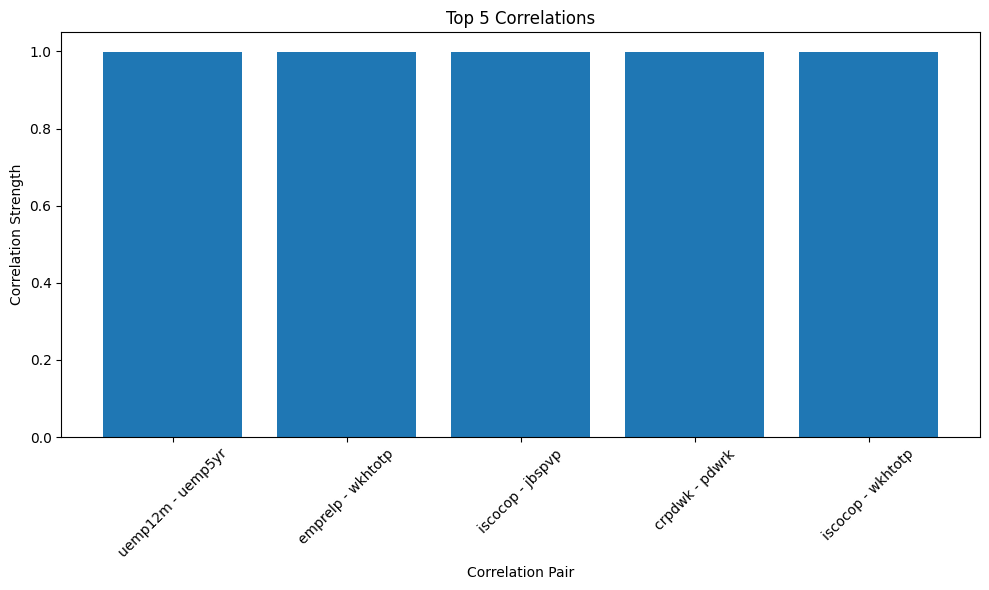

In [5]:
df_dub_dropped = filtered_df.dropna()


#Perform correlation
df_corr = df_dub_dropped.corr(method='pearson')
df_corr_drop_dup = df_corr.mask(np.tril(np.ones(df_corr.shape)).astype(np.bool))
df_corr_drop_dup_new = df_corr_drop_dup[abs(df_corr_drop_dup) >= 0.5].stack().reset_index()
df_corr_drop_dup_new.columns = ['Variable 1', 'Variable 2', 'R2 > 0.5']
top_5_correlations = df_corr_drop_dup_new.sort_values(by='R2 > 0.5', ascending=False).head()

# Create a bar graph to showcase the top 5 correlations
plt.figure(figsize=(10, 6))
plt.bar(top_5_correlations['Variable 1'] + ' - ' + top_5_correlations['Variable 2'], top_5_correlations['R2 > 0.5'])
plt.xlabel('Correlation Pair')
plt.ylabel('Correlation Strength')
plt.title('Top 5 Correlations')
plt.xticks(rotation=45)
plt.tight_layout()


# Show the plot
plt.show()

In [39]:
# Output to csv
df_corr.to_csv("output_data/Large_GB_Final_Corr.csv")

# Finland

In [53]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
np.bool = np.bool_

# Load the data from the CSV file
df = pd.read_csv('Large_FI_corr.csv')

In [54]:
df.head()

,Unnamed: 0,essround,edition,idno,dweight,pspwght,pweight,anweight,prob,stratum,...,wkhtotp,wrkac6m,wrkctr,wrkctra,wrkctrhu,wkdcorg,wkdcorga,nacer1,nacer11,nacer2
0,essround,1.000000e+00,-7.027819e-01,0.673966,NaN,5.005112e-09,7.126469e-01,0.350553,1.000000e+00,0.069083,...,0.016627,-0.031972,NaN,-0.024669,NaN,NaN,-0.018845,NaN,0.081532,-0.028174
1,edition,-7.027819e-01,1.000000e+00,-0.364849,NaN,7.713050e-09,-2.883282e-01,-0.137483,NaN,NaN,...,-0.013674,0.018853,NaN,0.012416,NaN,NaN,0.006673,NaN,0.086999,-0.005746
2,idno,6.739656e-01,-3.648485e-01,1.000000,NaN,5.374789e-03,5.765056e-01,0.275785,-4.566352e-01,-0.034107,...,0.016742,-0.013619,0.026069,-0.012060,NaN,0.056185,-0.002004,0.011723,-0.025213,-0.009704
3,dweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pspwght,5.005112e-09,7.713050e-09,0.005375,NaN,1.000000e+00,2.130515e-09,0.874578,-2.437876e-08,0.024601,...,0.030790,0.182383,-0.059066,0.096220,NaN,-0.087176,0.113454,-0.023446,0.085015,0.161072


In [55]:
# Drop 'name' column
df_dropped = df.drop(['Unnamed: 0', 'essround', 'edition', 'idno', "wrkctrhu"], axis=1)

df_dropped


non_null_counts = df_dropped.count()
columns_to_keep = non_null_counts >= 130
filtered_df = df_dropped.loc[:, columns_to_keep]
filtered_df

,pspwght,pweight,anweight,stfgov,trstlgl,trstplt,trstprt,hhmmb,gndr,agea,...,uempla,uemplap,uempli,uemplip,wkhct,wkhtot,wkhtotp,wrkac6m,wrkctra,wkdcorga
0,5.005112e-09,7.126469e-01,0.350553,-0.060680,0.000073,-0.005643,-0.022507,-0.060509,-0.010931,0.096489,...,0.015994,-0.013942,-0.009945,0.004306,-0.021065,-0.023238,0.016627,-0.031972,-0.024669,-0.018845
1,7.713050e-09,-2.883282e-01,-0.137483,0.039964,0.000581,0.006223,0.025729,0.047479,0.007010,-0.080175,...,-0.026568,0.004928,0.001962,-0.012741,0.024153,0.014172,-0.013674,0.018853,0.012416,0.006673
2,5.374789e-03,5.765056e-01,0.275785,-0.035148,0.005665,0.002597,-0.004841,-0.038489,-0.001133,0.059434,...,0.004287,-0.010161,-0.011361,0.003996,-0.003214,-0.003046,0.016742,-0.013619,-0.012060,-0.002004
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.000000e+00,2.130515e-09,0.874578,0.010437,-0.007143,0.003661,0.017122,0.126724,0.015275,-0.355377,...,0.049016,-0.000479,0.038604,-0.002196,0.093097,0.088318,0.030790,0.182383,0.096220,0.113454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,-8.717623e-02,NaN,-0.087176,0.076711,0.039266,0.048349,NaN,-0.023246,0.018858,0.245229,...,0.112649,-0.027582,0.126562,-0.018121,0.212208,0.246329,0.367079,NaN,NaN,NaN
153,1.134539e-01,-1.530025e-02,0.094620,0.126570,0.130727,0.122565,0.136399,0.075890,0.007217,-0.088113,...,-0.021346,-0.020846,0.016793,-0.008350,0.567006,0.579732,0.112107,0.738750,0.391913,1.000000
154,-2.344621e-02,NaN,-0.023446,0.097069,0.087339,0.092310,NaN,0.188568,0.078927,-0.180908,...,0.017530,0.019656,-0.003109,-0.019623,0.528276,0.581337,0.121496,NaN,NaN,NaN
155,8.501475e-02,-6.385386e-02,0.092358,0.014058,0.030805,0.037316,0.053132,0.070716,0.054782,-0.134445,...,-0.000956,-0.030249,0.018757,0.005563,0.368698,0.373668,0.069482,0.551378,0.238608,0.476751


In [56]:
df_dub_dropped = filtered_df.dropna()


#Perform correlation
df_corr = df_dub_dropped.corr(method='pearson')
df_corr_drop_dup = df_corr.mask(np.tril(np.ones(df_corr.shape)).astype(np.bool))
df_corr_drop_dup_new = df_corr_drop_dup[abs(df_corr_drop_dup) >= 0.5].stack().reset_index()
df_corr_drop_dup_new.columns = ['Variable 1', 'Variable 2', 'R2 > 0.5']
df_corr_drop_dup_new.sort_values(by='R2 > 0.5', ascending=False).head()

#Renaming columns


,Variable 1,Variable 2,R2 > 0.5
107,crpdwk,pdwrk,0.999791
186,emprelp,wkhtotp,0.999484
243,iscocop,jbspvp,0.999122
251,iscocop,wkhtotp,0.997176
176,emprelp,iscocop,0.996968


In [ ]:
# Output to csv
df_corr.to_csv("output_data/Large_FI_Final_Corr.csv")

# Hungary

In [30]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
np.bool = np.bool_

# Load the data from the CSV file
df = pd.read_csv('Large_HU_corr.csv')

In [31]:
df.head()

,Unnamed: 0,essround,edition,idno,dweight,pspwght,pweight,anweight,prob,stratum,...,wkhtotp,wrkac6m,wrkctr,wrkctra,wrkctrhu,wkdcorg,wkdcorga,nacer1,nacer11,nacer2
0,essround,1.000000,-0.690295,0.535153,0.000013,-0.026193,-0.440529,-0.073017,0.119370,-0.553873,...,0.094949,-0.020299,NaN,-0.047139,NaN,NaN,-0.067949,NaN,0.060070,0.070772
1,edition,-0.690295,1.000000,-0.155447,-0.000002,0.028555,0.136016,0.064935,NaN,NaN,...,-0.093885,0.017947,NaN,0.023818,NaN,NaN,0.030321,NaN,0.060070,0.010497
2,idno,0.535153,-0.155447,1.000000,-0.005620,-0.013194,-0.242814,-0.023686,-0.051946,0.262288,...,-0.049381,-0.000070,-0.018735,-0.019116,-0.024285,-0.031203,-0.022648,NaN,0.096412,0.052092
3,dweight,0.000013,-0.000002,-0.005620,1.000000,0.664889,-0.000003,0.414158,-0.983179,0.135853,...,-0.047449,0.001876,NaN,0.000180,NaN,NaN,0.022518,NaN,0.050041,-0.010439
4,pspwght,-0.026193,0.028555,-0.013194,0.664889,1.000000,0.005279,0.975408,-0.459979,0.083166,...,-0.006749,0.103421,0.073596,0.085957,0.057261,-0.059802,0.104605,NaN,0.060015,0.130469


In [32]:
# Drop 'name' column
df_dropped = df.drop(['Unnamed: 0', 'essround', 'edition', 'idno', "wrkctrhu"], axis=1)

df_dropped

non_null_counts = df_dropped.count()
columns_to_keep = non_null_counts >= 130
filtered_df = df_dropped.loc[:, columns_to_keep]
filtered_df

,dweight,pspwght,pweight,anweight,stfgov,trstlgl,trstplt,trstprt,hhmmb,gndr,...,uempla,uemplap,uempli,uemplip,wkhct,wkhtot,wkhtotp,wrkac6m,wrkctra,wkdcorga
0,0.000013,-0.026193,-0.440529,-0.073017,-0.035593,-0.027926,-0.009965,-0.009934,-0.091599,0.038227,...,-0.043777,-0.043260,-0.035433,-0.029407,-0.093745,-0.074249,0.094949,-0.020299,-0.047139,-0.067949
1,-0.000002,0.028555,0.136016,0.064935,0.064757,0.029168,0.022121,-0.000731,0.070007,-0.032526,...,0.011894,0.024052,0.018882,0.007722,0.097178,0.076188,-0.093885,0.017947,0.023818,0.030321
2,-0.005620,-0.013194,-0.242814,-0.023686,-0.015327,-0.014449,0.000617,0.001553,-0.054144,0.005588,...,-0.022560,-0.012334,-0.010008,-0.018200,-0.053134,-0.044501,-0.049381,-0.000070,-0.019116,-0.022648
3,1.000000,0.664889,-0.000003,0.414158,-0.022784,-0.027457,-0.027480,-0.020299,0.055784,-0.000221,...,-0.000244,0.009729,-0.013852,-0.007099,0.006796,-0.003354,-0.047449,0.001876,0.000180,0.022518
4,0.664889,1.000000,0.005279,0.975408,0.007480,0.004344,0.011585,0.012465,0.102852,-0.137116,...,0.025248,0.013408,0.005866,-0.001190,0.082115,0.077003,-0.006749,0.103421,0.085957,0.104605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,NaN,-0.059802,NaN,-0.059802,0.030132,0.087899,0.088992,NaN,-0.121196,0.067549,...,0.136950,-0.021087,0.110158,-0.007006,0.368708,0.315391,0.279403,NaN,NaN,NaN
153,0.022518,0.104605,0.019942,0.101373,0.124324,0.077836,0.125642,0.124823,0.110854,0.005246,...,-0.019996,-0.007227,0.026649,0.009476,0.610084,0.586805,0.104111,0.820851,0.645466,1.000000
154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,0.050041,0.060015,-0.060070,-0.025982,0.111614,0.071870,0.117217,0.112305,0.144006,0.035373,...,-0.024704,-0.005504,-0.000026,0.024798,0.441675,0.473676,0.110057,0.699065,0.462773,0.651673


In [33]:
df_dub_dropped = filtered_df.dropna()


#Perform correlation
df_corr = df_dub_dropped.corr(method='pearson')
df_corr_drop_dup = df_corr.mask(np.tril(np.ones(df_corr.shape)).astype(np.bool))
df_corr_drop_dup_new = df_corr_drop_dup[abs(df_corr_drop_dup) >= 0.5].stack().reset_index()
df_corr_drop_dup_new.columns = ['Variable 1', 'Variable 2', 'R2 > 0.5']
df_corr_drop_dup_new.sort_values(by='R2 > 0.5', ascending=False).head()

#Renaming columns


,Variable 1,Variable 2,R2 > 0.5
214,iorgact,wkdcorga,0.999578
284,uemp12m,uemp5yr,0.999372
57,crpdwk,pdwrk,0.998819
71,dngnapp,edulvlpa,0.994142
160,emplrel,wrkac6m,0.993205


In [ ]:
# Output to csv
df_corr.to_csv("output_data/Large_HU_Final_Corr.csv")

# Switzerland 

In [34]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
np.bool = np.bool_

# Load the data from the CSV file
df = pd.read_csv('Large_CH_corr.csv')

In [35]:
df.head()

,Unnamed: 0,essround,edition,idno,dweight,pspwght,pweight,anweight,prob,stratum,...,wkhtotp,wrkac6m,wrkctr,wrkctra,wrkctrhu,wkdcorg,wkdcorga,nacer1,nacer11,nacer2
0,essround,1.000000,-0.696219,0.506170,0.000141,0.000377,0.943920,0.488728,1.000000e+00,0.999541,...,-0.027982,0.002522,NaN,-0.004190,NaN,NaN,0.006299,NaN,-0.033863,0.038257
1,edition,-0.696219,1.000000,-0.098615,-0.000224,-0.000614,-0.710719,-0.487572,NaN,NaN,...,0.011848,0.002322,NaN,-0.006049,NaN,NaN,0.000058,NaN,-0.016612,0.028537
2,idno,0.506170,-0.098615,1.000000,-0.000804,-0.005171,0.363349,0.165538,-4.931828e-01,-0.492006,...,-0.012005,-0.008201,-0.024615,-0.016655,NaN,0.016167,-0.003122,-0.003594,0.101350,0.039342
3,dweight,0.000141,-0.000224,-0.000804,1.000000,0.875333,0.000133,0.666257,NaN,NaN,...,-0.183799,0.099526,0.115508,0.058559,NaN,-0.014448,0.081468,0.110659,0.084919,NaN
4,pspwght,0.000377,-0.000614,-0.005171,0.875333,1.000000,0.000352,0.841947,2.010000e-08,-0.000215,...,-0.117166,0.101697,0.119003,0.051613,NaN,0.027055,0.089268,0.149577,0.043430,0.039515


In [36]:
# Drop 'name' column
df_dropped = df.drop(['Unnamed: 0', 'essround', 'edition', 'idno', "wrkctrhu"], axis=1)

df_dropped

non_null_counts = df_dropped.count()
columns_to_keep = non_null_counts >= 130
filtered_df = df_dropped.loc[:, columns_to_keep]
filtered_df

,dweight,pspwght,pweight,anweight,stfgov,trstlgl,trstplt,trstprt,hhmmb,gndr,...,uempla,uemplap,uempli,uemplip,wkhct,wkhtot,wkhtotp,wrkac6m,wrkctra,wkdcorga
0,0.000141,0.000377,0.943920,0.488728,0.070085,0.022879,0.048028,0.022367,0.069397,-0.041825,...,0.017773,0.020570,0.013965,0.003136,0.030435,-0.001747,-0.027982,0.002522,-0.004190,0.006299
1,-0.000224,-0.000614,-0.710719,-0.487572,-0.045290,-0.014016,-0.024422,0.002608,-0.038047,0.021565,...,-0.014859,-0.022040,-0.016647,-0.002830,-0.036863,-0.011488,0.011848,0.002322,-0.006049,0.000058
2,-0.000804,-0.005171,0.363349,0.165538,0.061369,0.023399,0.038882,0.030346,0.052258,-0.017623,...,0.009745,0.004218,-0.005384,0.001633,0.011862,0.003021,-0.012005,-0.008201,-0.016655,-0.003122
3,1.000000,0.875333,0.000133,0.666257,0.015465,-0.000997,0.008809,0.012634,0.228966,-0.051603,...,0.007952,0.025452,0.003548,0.002078,0.048589,0.047828,-0.183799,0.099526,0.058559,0.081468
4,0.875333,1.000000,0.000352,0.841947,0.021572,0.001927,0.004984,0.003843,0.189430,-0.016270,...,0.016040,0.036630,0.006685,0.000988,0.058513,0.056474,-0.117166,0.101697,0.051613,0.089268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,-0.014448,0.027055,NaN,0.027055,0.031057,0.022779,0.026028,NaN,-0.035247,0.056290,...,0.106751,-0.034315,0.057425,-0.014363,0.263672,0.257339,0.179141,NaN,NaN,NaN
153,0.081468,0.089268,0.004880,0.048284,0.064464,0.044086,0.044513,0.051563,0.066973,0.035784,...,0.006944,-0.002332,-0.013105,0.001470,0.522422,0.526665,0.101177,0.837636,0.504137,1.000000
154,0.110659,0.149577,NaN,0.149577,0.068688,0.047007,0.076268,NaN,0.037007,0.071466,...,0.019224,-0.019802,0.036769,-0.012486,0.484527,0.464797,0.059608,NaN,NaN,NaN
155,0.084919,0.043430,-0.044973,0.066647,0.072068,0.084013,0.085272,0.068193,0.060859,0.094998,...,0.003160,0.002014,-0.005828,-0.015542,0.315600,0.337039,0.054549,0.533327,0.275257,0.474134


In [37]:
df_dub_dropped = filtered_df.dropna()


#Perform correlation
df_corr = df_dub_dropped.corr(method='pearson')
df_corr_drop_dup = df_corr.mask(np.tril(np.ones(df_corr.shape)).astype(np.bool))
df_corr_drop_dup_new = df_corr_drop_dup[abs(df_corr_drop_dup) >= 0.5].stack().reset_index()
df_corr_drop_dup_new.columns = ['Variable 1', 'Variable 2', 'R2 > 0.5']
df_corr_drop_dup_new.sort_values(by='R2 > 0.5', ascending=False).head()

#Renaming columns


,Variable 1,Variable 2,R2 > 0.5
241,uemp12m,uemp5yr,0.999639
73,crpdwk,pdwrk,0.999378
147,emprelp,wkhtotp,0.999039
180,iorgact,wkdcorga,0.997189
188,iscocop,jbspvp,0.997088


In [ ]:
# Output to csv
df_corr.to_csv("output_data/Large_CH_Final_Corr.csv")